<a href="https://colab.research.google.com/github/b21renu/PredaPing/blob/main/Data_Preprocessing_Toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

In [ ]:
#import neccessary libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import emoji
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load in the train data
train = pd.read_csv('/content/drive/My Drive/PredaPing/train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
#load in the test data
test = pd.read_csv('/content/drive/My Drive/PredaPing/test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
#load in the test labels
test_labels = pd.read_csv('/content/drive/My Drive/PredaPing/test_labels.csv')
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
len(test_labels)

153164

In [ ]:
#remove unneccesary rows
test_labels = test_labels[~test_labels['toxic']<0]

In [ ]:
#combine the test data and its labels
test = pd.merge(test, test_labels, on='id')

In [ ]:
len(train), len(test)

(159571, 63978)

In [ ]:
#combine train and test
df = pd.concat([train,test]).reset_index().drop(columns='index')

In [ ]:
df.loc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
#search for all features that are 0
df[(df['toxic']==0)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==0)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223543,fff8f521a7dbcd47,shut down the mexican border withought looking...,0,0,0,0,0,0
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0


In [ ]:
df.loc[59]['comment_text']

"Why can't you believe how fat Artie is? Did you see him on his recent appearence on the Tonight Show with Jay Leno? He looks absolutely AWFUL! If I had to put money on it, I'd say that Artie Lange is a can't miss candidate for the 2007 Dead pool!   \n\n  \nKindly keep your malicious fingers off of my above comment, . Everytime you remove it, I will repost it!!!"

In [ ]:
#create a condition to be used to create the labels
conditions = [(df['toxic']==0)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==0)&(df['identity_hate']==0),
             (df['toxic']==1)&(df['severe_toxic']==0)&(df['obscene']==0)&(df['threat']==0)&(df['insult']==1)&(df['identity_hate']==0),
             (df['toxic']==1)&(df['severe_toxic']==1)&(df['obscene']==1)&(df['threat']==1)&(df['insult']==1)&(df['identity_hate']==1)]

In [ ]:
#names of the labels
values = ['non risky', 'potentially risky', 'too risky']

In [ ]:
#create the labels based on tehe above conidtions
df['labels'] = np.select(conditions, values)

In [ ]:
#distribution of the labels
df['labels'].value_counts()

,count
labels,
non risky,201081
0,20669
potentially risky,1754
too risky,45


In [ ]:
#some of the data did now belong to any category based on the condition, yet they are suppposed to be too risky
df['labels'] = df['labels'].replace({'0':'too risky'})

In [ ]:
#distribution of labels
(df['labels'].value_counts(dropna=False, normalize=True))*100

,proportion
labels,
non risky,89.949407
too risky,9.265977
potentially risky,0.784615


In [ ]:
#convert labels into numerical format as requested in the repo
df['labels'] = df['labels'].map({'non risky':'0','potentially risky':'1','too risky':'2'})

In [ ]:
#percentage distribution of labels, very imbalanced
(df['labels'].value_counts(dropna=False, normalize=True))*100

,proportion
labels,
0,89.949407
2,9.265977
1,0.784615


### Clean sentence Training

#### Checking for missing values

In [ ]:
print(f"How many missing values are there? {df.isnull().any().sum()}")

How many missing values are there? 0


#### stopwords and lemmatizing

In [ ]:
#instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_texts(text):
    """Removes digits, words containing digits, punctuations, special characters, extra spaces and links from text

    Args:
        text (str): raw texts
    Returns:
        text (str) : cleaned texts
    """
    #removes links
    text = re.sub(r'http*\S+', '', text)
    #removes digits
    text = re.sub('\d+','', text)
    #removes punctuations and special characters
    text = re.sub('[^a-zA-Z]+', ' ', text)
    return text

In [ ]:
df['cleaned_texts'] = df['comment_text'].apply(clean_texts)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Convert stopwords to a set for faster lookup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Apply the function to clean texts
df['cleaned_texts'] = df['comment_text'].apply(clean_texts)

# Tokenize, remove stopwords, and lemmatize all in a single step
def process_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the processing to the entire 'cleaned_texts' column
df['processed_texts'] = df['cleaned_texts'].apply(process_text)

# Convert the processed text column to a list if needed
corpus = df['processed_texts'].tolist()

In [ ]:
#create dataframe with the appropriate name as accoridng to repo guidelines
corpus = pd.DataFrame(corpus, columns=['clean_sentence_training'])

In [ ]:
#merge the main dataframe with the cleaned one
df = pd.concat([df, corpus], axis=1)

In [ ]:
#function to compare the raw texts to the cleaned
def compare(df, index):
    """Compares the raw text to the cleaned text

    Args:
        df (pandas dataframe): dataframe containing raw texts and cleaned texts
        index (int) : position of comment in the dataframe
    Returns:
        None
    """
    print('RAW TEXT')
    print(df.loc[index]['comment_text'])
    print('\n\n')
    print('CLEANED TEXT FOR TRAINING')
    print(df.loc[index]['clean_sentence_training'])

In [ ]:
compare(df, 42)

RAW TEXT
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!



CLEANED TEXT FOR TRAINING
You gay antisemmitian Archangel WHite Tiger Meow Greetingshhh Uh two way erased comment WW holocaust brutally slaying Jews gay Gypsys Slavs anyone If anti semitian shave head bald go skinhead meeting If doubt word Bible homosexuality deadly sin make pentagram tatoo forehead go satanistic mass gay pal First last 

In [ ]:
#function to check for emojis
def extract_emojis(s):
    """Checks if there are any emojis present

    Args:
        s (pandas series): column containing the texts
    Returns:
        result (list) : list containing emoji values if present, if not, empty string
    """
    result= ''.join(c for c in s if c in emoji.EMOJI_DATA)
    return result

In [ ]:
extract_emojis(df['comment_text'])

''

In [ ]:
#rename columns to match the appropriate format requested in the repo
df = df.rename(columns={'comment_text':'raw_sentence','labels':'label'})

In [ ]:
#make a column called corpus that contains the text Toxic Comment Classification Challenge
df = df.assign(corpus_name = lambda x:'Toxic Comment Classification Challenge')

In [ ]:
df.head(2)

,id,raw_sentence,toxic,severe_toxic,obscene,threat,insult,identity_hate,label,cleaned_texts,processed_texts,clean_sentence_training,corpus_name
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why edits made username Hardcore M...,Explanation Why edits made username Hardcore M...,Toxic Comment Classification Challenge
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,D aww He matches this background colour I m se...,D aww He match background colour I seemingly s...,D aww He match background colour I seemingly s...,Toxic Comment Classification Challenge


In [ ]:
#duplicate the clean_sentence_training, to become clean_sentence_EDA since there were no emojis
df['clean_sentence_EDA'] = df['clean_sentence_training']

In [ ]:
#select only relevant columns
df = df[['corpus_name','raw_sentence','label','clean_sentence_training','clean_sentence_EDA']]

In [ ]:
df

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,Toxic Comment Classification Challenge,Explanation\nWhy the edits made under my usern...,0,Explanation Why edits made username Hardcore M...,Explanation Why edits made username Hardcore M...
1,Toxic Comment Classification Challenge,D'aww! He matches this background colour I'm s...,0,D aww He match background colour I seemingly s...,D aww He match background colour I seemingly s...
2,Toxic Comment Classification Challenge,"Hey man, I'm really not trying to edit war. It...",0,Hey man I really trying edit war It guy consta...,Hey man I really trying edit war It guy consta...
3,Toxic Comment Classification Challenge,"""\nMore\nI can't make any real suggestions on ...",0,More I make real suggestion improvement I wond...,More I make real suggestion improvement I wond...
4,Toxic Comment Classification Challenge,"You, sir, are my hero. Any chance you remember...",0,You sir hero Any chance remember page,You sir hero Any chance remember page
...,...,...,...,...,...
223544,Toxic Comment Classification Challenge,":Jerome, I see you never got around to this…! ...",0,Jerome I see never got around I surprised I lo...,Jerome I see never got around I surprised I lo...
223545,Toxic Comment Classification Challenge,==Lucky bastard== \n http://wikimediafoundatio...,0,Lucky bastard Heh famous I kida envy Congrats,Lucky bastard Heh famous I kida envy Congrats
223546,Toxic Comment Classification Challenge,==shame on you all!!!== \n\n You want to speak...,0,shame You want speak gay romanian,shame You want speak gay romanian
223547,Toxic Comment Classification Challenge,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...


In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.8 MB/s eta 0:00:00


In [ ]:
!pip install spacy==3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.13.0
    Uninstalling typer-0.13.0:
      Successfully uninstalled typer-0.13.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.5
    Uninstalling smart-open-7.0.5:
      Successfully uninstalled smart-open-7.0.5
  Attempting uninstall: pydantic
    Found existing i

In [ ]:
!python -m spacy download en_core_web_sm

2024-11-21 07:08:09.589944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-21 07:08:09.623107: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-21 07:08:09.635254: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 07:08:09.658172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 07:08:12.006946: W tensorflow/compiler/tf2

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
# import texthero as hero
import matplotlib.pyplot as plt
import textstat as ts
sns.set()

In [ ]:
df.isnull().sum()

,0
corpus_name,0
raw_sentence,0
label,0
clean_sentence_training,0
clean_sentence_EDA,0


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
keys = ['non risky', 'potenially risky', 'risky']

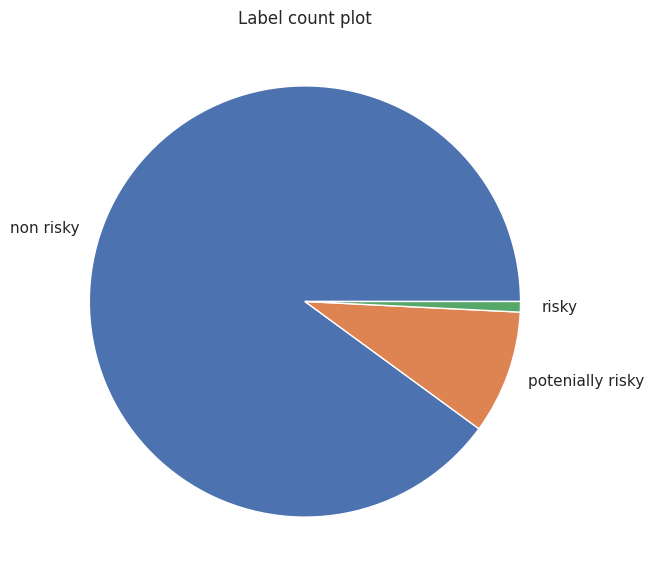

In [ ]:
plt.figure(figsize = (10,7))
plt.pie(df['label'].value_counts(), labels = keys)
plt.title('Label count plot')
plt.show()

In [ ]:
import spacy
from tqdm import tqdm

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Use spaCy's pipe method for faster processing
def remove_stopwords_spacy_pipe(texts):
    cleaned_texts = []
    for doc in nlp.pipe(texts, batch_size=100, n_process=-1):  # Batch processing
        cleaned_texts.append(" ".join([token.text for token in doc if not token.is_stop]))
    return cleaned_texts

In [ ]:
# df['clean_sentence_EDA'] = remove_stopwords_spacy_pipe(df['clean_sentence_EDA'])

In [ ]:
# !pip install texthero

In [ ]:
# import texthero as hero
# top = hero.visualization.top_words(df['clean_sentence_EDA']).head(20)

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Combine all the cleaned sentences into a single text
all_words = " ".join(df['clean_sentence_EDA'])

# Split the text into individual words
word_list = all_words.split()

# Use Counter to count word frequencies
word_counts = Counter(word_list)

# Get the 20 most common words
top_words = word_counts.most_common(20)

# Separate the words and their counts for plotting
words, counts = zip(*top_words)

In [ ]:
from collections import Counter
import pandas as pd

# Step 1: Combine all sentences into one large string
all_words = " ".join(df['clean_sentence_EDA']).split()

# Step 2: Count the frequency of each word using Counter
word_counts = Counter(all_words)

# Step 3: Convert to a DataFrame for easy manipulation and visualization
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Step 4: Sort by frequency and select the top 20 words
top = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

print(top)

          Word  Frequency
13           I     302781
90     article      97956
24        page      73010
372        The      60170
99   Wikipedia      51350
135      would      39142
79         one      38792
307       like      37771
182         If      35374
103        You      34580
23        talk      34028
44          It      32022
216     source      29197
69       think      28541
86        know      26695
426        see      25736
677       time      24401
871     people      24231
474       This      23282
42        edit      22820


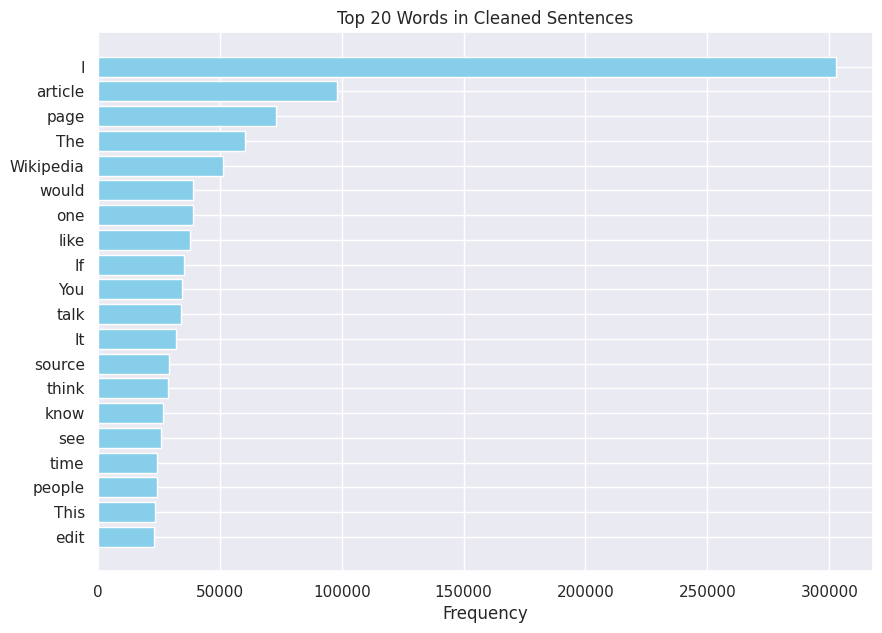

In [ ]:
# Plot the top 20 words
plt.figure(figsize=(10,7))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Cleaned Sentences')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

In [ ]:
top_df = pd.DataFrame(top)
top_df.reset_index(inplace=True)
top_df.rename(columns = {'index':'Top 20 words'}, inplace = True)

In [ ]:
top_df.head()

,Top 20 words,Word,Frequency
0,13,I,302781
1,90,article,97956
2,24,page,73010
3,372,The,60170
4,99,Wikipedia,51350


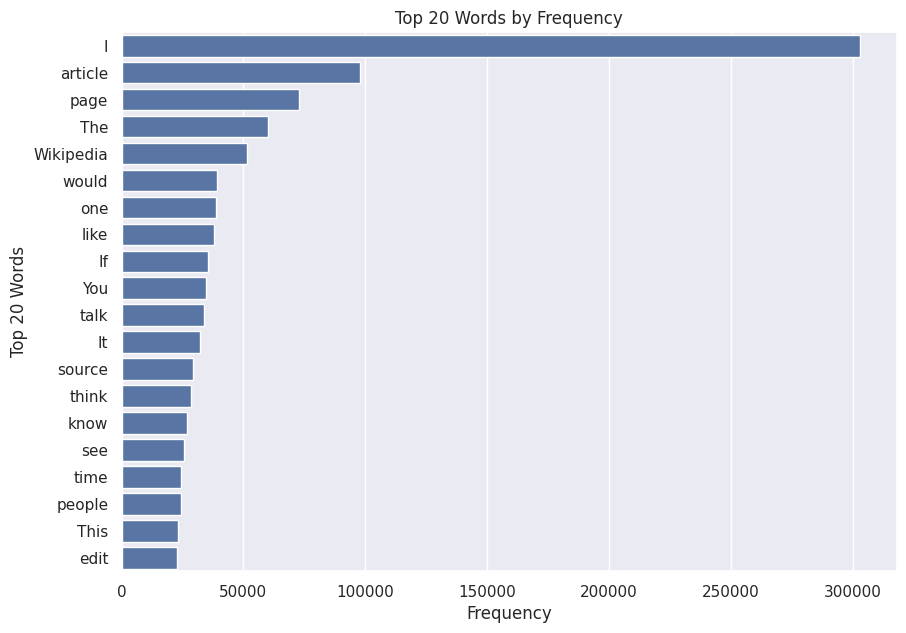

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top' is the DataFrame with columns 'Word' and 'Frequency'
plt.figure(figsize=(10, 7))
sns.barplot(x='Frequency', y='Word', data=top_df)
plt.title('Top 20 Words by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Top 20 Words')
plt.show()

# N-GRAM

In [ ]:
import pandas as pd
from nltk import ngrams, everygrams
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
#following function returns the n-gram tokens and labels from the corpora
def get_tokens_ngram(test_size=0.2, ngram=1):
    tokenizer = TweetTokenizer()
    train_tokens = []
    data_train, data_test, train_labels, test_labels = train_test_split(x, y ,test_size=test_size, shuffle=True, random_state=42)
    print(f'Samples in data_train: {len(data_train)},\nSamples in data_test: {len(data_test)},\nSamples in label_train: {len(train_labels)},\nSamples in label_test: {len(test_labels)}')
    for idx in range(data_train.shape[0]):
        words = tokenizer.tokenize(data_train.iloc[idx]['clean_sentence_EDA'])
        if ngram != 1:
            ngram_words = ngrams(words, ngram)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            train_tokens.append(tokens_rec)
        else:
            train_tokens.append(words)
    test_tokens = []
    for idx in range(data_test.shape[0]):
        words = tokenizer.tokenize(data_test.iloc[idx]['clean_sentence_EDA'])
        if ngram != 1:
            ngram_words = ngrams(words, ngram)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            test_tokens.append(tokens_rec)
        else:
            test_tokens.append(words)
    return train_tokens, train_labels, test_tokens, test_labels

In [ ]:
#following function returns the every-gram tokens and labels from the corpora
def get_tokens_every_gram(test_size=0.2, min_length=1, max_length=5):
    tokenizer = TweetTokenizer()
    train_tokens = []
    data_train, data_test, train_labels, test_labels = train_test_split(x, y ,test_size=test_size, shuffle=True, random_state=42)
    print(f'Samples in data_train: {len(data_train)},\nSamples in data_test: {len(data_test)},\nSamples in label_train: {len(train_labels)},\nSamples in label_test: {len(test_labels)}')
    for idx in range(data_train.shape[0]):
        words = tokenizer.tokenize(data_train.iloc[idx]['clean_sentence_EDA'])
        if min_length != 1:
            ngram_words = everygrams(words, min_len=min_length, max_len=max_length)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            train_tokens.append(tokens_rec)
        else:
            train_tokens.append(words)
    test_tokens = []
    for idx in range(data_test.shape[0]):
        words = tokenizer.tokenize(data_test.iloc[idx]['clean_sentence_EDA'])
        if min_length != 1:
            ngram_words = everygrams(words, min_len=min_length, max_len=max_length)
            tokens_rec = []
            for ng in ngram_words:
                tokens_rec.append(ng)
            test_tokens.append(tokens_rec)
        else:
            test_tokens.append(words)
    return train_tokens, train_labels, test_tokens, test_labels

In [ ]:
df.head()

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,Toxic Comment Classification Challenge,Explanation\nWhy the edits made under my usern...,0,Explanation Why edits made username Hardcore M...,Explanation Why edits made username Hardcore M...
1,Toxic Comment Classification Challenge,D'aww! He matches this background colour I'm s...,0,D aww He match background colour I seemingly s...,D aww He match background colour I seemingly s...
2,Toxic Comment Classification Challenge,"Hey man, I'm really not trying to edit war. It...",0,Hey man I really trying edit war It guy consta...,Hey man I really trying edit war It guy consta...
3,Toxic Comment Classification Challenge,"""\nMore\nI can't make any real suggestions on ...",0,More I make real suggestion improvement I wond...,More I make real suggestion improvement I wond...
4,Toxic Comment Classification Challenge,"You, sir, are my hero. Any chance you remember...",0,You sir hero Any chance remember page,You sir hero Any chance remember page


In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
print(df.columns)

Index(['corpus_name', 'raw_sentence', 'label', 'clean_sentence_training',
       'clean_sentence_EDA'],
      dtype='object')


In [ ]:
data_train, label_train, data_test, label_test = get_tokens_every_gram(min_length=1, max_length=3)
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=lambda x: x)), # converts strings to integer counts
    ('tfidf', TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])
pipeline.fit(data_train, label_train)
predictions = pipeline.predict(data_test)
print(classification_report(label_test, predictions))

Samples in data_train: 178839,
Samples in data_test: 44710,
Samples in label_train: 178839,
Samples in label_test: 44710


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     40225
           1       0.00      0.00      0.00       340
           2       0.84      0.21      0.33      4145

    accuracy                           0.92     44710
   macro avg       0.59      0.40      0.43     44710
weighted avg       0.90      0.92      0.89     44710



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


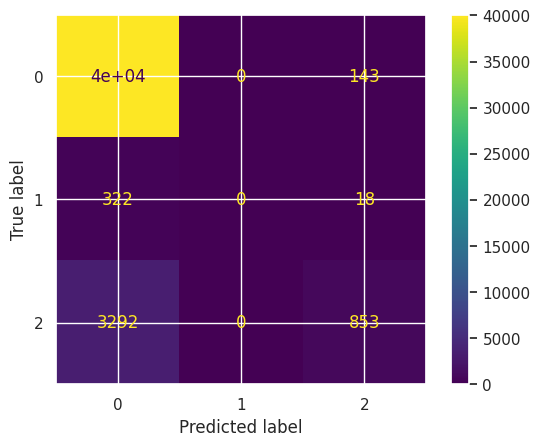

In [ ]:
ConfusionMatrixDisplay.from_predictions(label_test, predictions)
plt.show();

In [ ]:
data_train, label_train, data_test, label_test = get_tokens_ngram(ngram=3)

Samples in data_train: 178839,
Samples in data_test: 44710,
Samples in label_train: 178839,
Samples in label_test: 44710


In [ ]:
data_train[0]

[('Above', 'user', 'en'),
 ('user', 'en', 'talk'),
 ('en', 'talk', 'page'),
 ('talk', 'page', 'one'),
 ('page', 'one', 'de'),
 ('one', 'de', 'Benutzer'),
 ('de', 'Benutzer', 'Diskussion'),
 ('Benutzer', 'Diskussion', 'Istiller'),
 ('Diskussion', 'Istiller', 'I'),
 ('Istiller', 'I', 'see'),
 ('I', 'see', 'problem'),
 ('see', 'problem', 'line'),
 ('problem', 'line', 'break'),
 ('line', 'break', 'text'),
 ('break', 'text', 'rather'),
 ('text', 'rather', 'junction'),
 ('rather', 'junction', 'shape'),
 ('junction', 'shape', 'missing'),
 ('shape', 'missing', 'The'),
 ('missing', 'The', 'icon'),
 ('The', 'icon', 'pretty'),
 ('icon', 'pretty', 'much'),
 ('pretty', 'much', 'common'),
 ('much', 'common', 'missing'),
 ('common', 'missing', 'en'),
 ('missing', 'en', 'likely'),
 ('en', 'likely', 'missing'),
 ('likely', 'missing', 'de'),
 ('missing', 'de', 'also')]

# RANDOM FOREST

In [ ]:
# pipeline = Pipeline([
#     ('vect', CountVectorizer(analyzer=lambda x: x)), # converts strings to integer counts
#     ('tfidf', TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
#     ('clf', RandomForestClassifier(n_estimators=40)) # train on TF-IDF vectors with Decision TRee classifier
# ])
# print('Starting Training')
# pipeline.fit(data_train, label_train)
# print('Training Finished Predictions Called')
# predictions = pipeline.predict(data_test)
# print('Predictions Finished')
# print(classification_report(label_test, predictions))

In [ ]:
# ConfusionMatrixDisplay.from_predictions(label_test, predictions)
# plt.show();

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline
plt.style.use('ggplot')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import re
import tensorflow as tf


#train split and fit models
from nltk.tokenize import TweetTokenizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
label_lst = ["Non-Risky", "Potentially Risky", "Risky"]

In [ ]:
df.head()

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,Toxic Comment Classification Challenge,Explanation\nWhy the edits made under my usern...,0,Explanation Why edits made username Hardcore M...,Explanation Why edits made username Hardcore M...
1,Toxic Comment Classification Challenge,D'aww! He matches this background colour I'm s...,0,D aww He match background colour I seemingly s...,D aww He match background colour I seemingly s...
2,Toxic Comment Classification Challenge,"Hey man, I'm really not trying to edit war. It...",0,Hey man I really trying edit war It guy consta...,Hey man I really trying edit war It guy consta...
3,Toxic Comment Classification Challenge,"""\nMore\nI can't make any real suggestions on ...",0,More I make real suggestion improvement I wond...,More I make real suggestion improvement I wond...
4,Toxic Comment Classification Challenge,"You, sir, are my hero. Any chance you remember...",0,You sir hero Any chance remember page,You sir hero Any chance remember page


In [ ]:
df.columns

Index(['corpus_name', 'raw_sentence', 'label', 'clean_sentence_training',
       'clean_sentence_EDA'],
      dtype='object')

In [ ]:
X = df[['clean_sentence_EDA', 'corpus_name']]
y = df[['clean_sentence_EDA','label']]

# LSTM + BERT


#TESTING

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, GlobalMaxPooling1D, Bidirectional, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

class ToxicityDetector:
    def __init__(self, max_length=128, bert_model='bert-base-uncased'):
        """
        Initialize the Toxicity Detection model

        Args:
            max_length (int): Maximum sequence length for tokenization
            bert_model (str): BERT model to use for embedding
        """
        # Set random seeds for reproducibility
        tf.random.set_seed(42)
        np.random.seed(42)

        # Initialize tokenizer and BERT model
        self.tokenizer = BertTokenizer.from_pretrained(bert_model)
        self.bert_model = TFBertModel.from_pretrained(bert_model)

        self.MAX_LEN = max_length
        self.model = None

    def preprocess_data(self, texts, labels):
        """
        Preprocess text data for model training

        Args:
            texts (list): List of input texts
            labels (list): Corresponding labels

        Returns:
            Tokenized input and encoded labels
        """
        # Tokenize texts
        encodings = self.tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=self.MAX_LEN,
            return_tensors='tf'
        )

        # Convert labels to categorical
        encoded_labels = tf.keras.utils.to_categorical(labels)

        return encodings, encoded_labels

    def build_model(self, num_classes=3):
       def build_model(self, num_classes=3):
        """
        Build BERT+LSTM model for toxicity detection

        Args:
            num_classes (int): Number of output classes

        Returns:
            Compiled Keras model
        """
        # Input layers
        input_ids = Input(shape=(self.MAX_LEN,), dtype=tf.int32, name="input_ids")
        attention_mask = Input(shape=(self.MAX_LEN,), dtype=tf.int32, name="attention_mask")

        # BERT embeddings
        # Convert KerasTensors to TensorFlow Tensors
        bert_output = self.bert_model(
            input_ids=tf.convert_to_tensor(input_ids),  # Convert to TensorFlow Tensor
            attention_mask=tf.convert_to_tensor(attention_mask)  # Convert to TensorFlow Tensor
        )[0]

        # Reshape and add LSTM layers
        reshape_layer = Reshape((1, -1))(bert_output)
        lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(reshape_layer)

        # Pooling and output layers
        pooling_layer = GlobalMaxPooling1D()(lstm_layer)
        dropout_layer = Dropout(0.3)(pooling_layer)
        output_layer = Dense(num_classes, activation='softmax')(dropout_layer)

        # Create and compile model
        model = Model(inputs=[input_ids, attention_mask], outputs=[output_layer])
        model.compile(
            loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=1e-5),
            metrics=['accuracy']
        )

        self.model = model
        return model

    def train_model(self, X_train, y_train, X_val, y_val, epochs=5, batch_size=16):
        """
        Train the toxicity detection model

        Args:
            X_train (list): Training texts
            y_train (list): Training labels
            X_val (list): Validation texts
            y_val (list): Validation labels
            epochs (int): Number of training epochs
            batch_size (int): Batch size for training

        Returns:
            Training history
        """
        # Preprocess training and validation data
        train_encodings, train_labels = self.preprocess_data(X_train, y_train)
        val_encodings, val_labels = self.preprocess_data(X_val, y_val)

        # Early stopping callback
        early_stop = EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            verbose=1,
            mode='max',
            restore_best_weights=True
        )

        # Train the model
        history = self.model.fit(
            {
                'input_ids': train_encodings['input_ids'],
                'attention_mask': train_encodings['attention_mask']
            },
            train_labels,
            validation_data=({
                'input_ids': val_encodings['input_ids'],
                'attention_mask': val_encodings['attention_mask']
            }, val_labels),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stop]
        )

        return history

    def evaluate_model(self, X_test, y_test):
        """
        Evaluate the model on test data

        Args:
            X_test (list): Test texts
            y_test (list): Test labels

        Returns:
            Classification report and confusion matrix
        """
        # Preprocess test data
        test_encodings, test_labels = self.preprocess_data(X_test, y_test)

        # Predict and convert to labels
        y_pred = self.model.predict({
            'input_ids': test_encodings['input_ids'],
            'attention_mask': test_encodings['attention_mask']
        })
        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.argmax(test_labels, axis=1)

        # Generate classification report
        print("Classification Report:")
        print(classification_report(y_true_labels, y_pred_labels))

        # Plot confusion matrix
        cm = confusion_matrix(y_true_labels, y_pred_labels)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.show()

        return y_pred_labels

    def predict(self, text):
        """
        Predict toxicity for a single text input

        Args:
            text (str): Input text to classify

        Returns:
            Predicted class and probability
        """
        # Tokenize input text
        text_tokenized = self.tokenizer.encode_plus(
            text,
            max_length=self.MAX_LEN,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )

        # Predict
        prediction = self.model.predict({
            'input_ids': text_tokenized['input_ids'],
            'attention_mask': text_tokenized['attention_mask']
        })

        # Get predicted class and probability
        pred_class = np.argmax(prediction)
        pred_prob = np.max(prediction)

        return pred_class, pred_prob

# Example usage
def main():
    # Load your dataset (replace with actual data loading)
    # Assuming you have X (texts) and y (labels)
    # X = pd.read_csv('your_texts.csv')
    # y = X['label']

    # Instantiate the model
    detector = ToxicityDetector()

    # Build the model
    detector.build_model(num_classes=3)  # Adjust num_classes as needed

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

    # Train the model
    history = detector.train_model(
        X_train.tolist(),
        y_train.tolist(),
        X_val.tolist(),
        y_val.tolist()
    )

    # Evaluate on test data
    detector.evaluate_model(X_test.tolist(), y_test.tolist())

    # Example prediction
    sample_text = "This is a potentially offensive message"
    pred_class, pred_prob = detector.predict(sample_text)
    print(f"Predicted Class: {pred_class}")
    print(f"Prediction Probability: {pred_prob}")

if __name__ == "__main__":
    main()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
!pip install torch


In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd

#data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/PredaPing/train.csv')
print(data.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


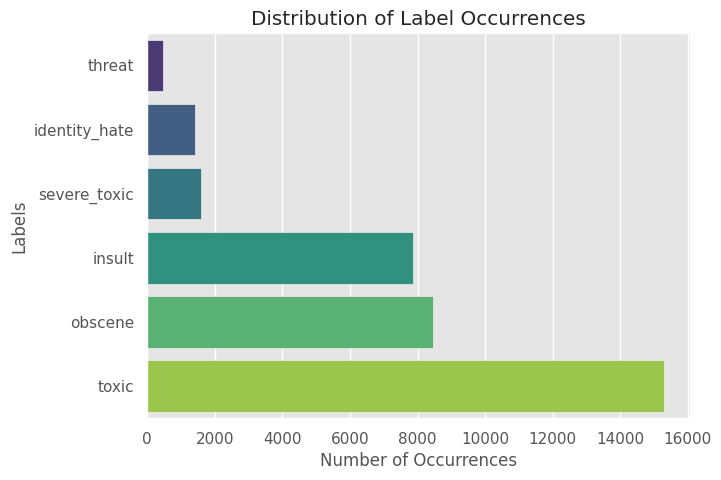

In [ ]:
column_labels = data.columns.tolist()[2:]
label_counts = data[column_labels].sum().sort_values()


# Create a black background for the plot
plt.figure(figsize=(7, 5))

# Create a horizontal bar plot using Seaborn
ax = sns.barplot(x=label_counts.values,
                 y=label_counts.index, palette='viridis')


# Add labels and title to the plot
plt.xlabel('Number of Occurrences')
plt.ylabel('Labels')
plt.title('Distribution of Label Occurrences')

# Show the plot
plt.show()

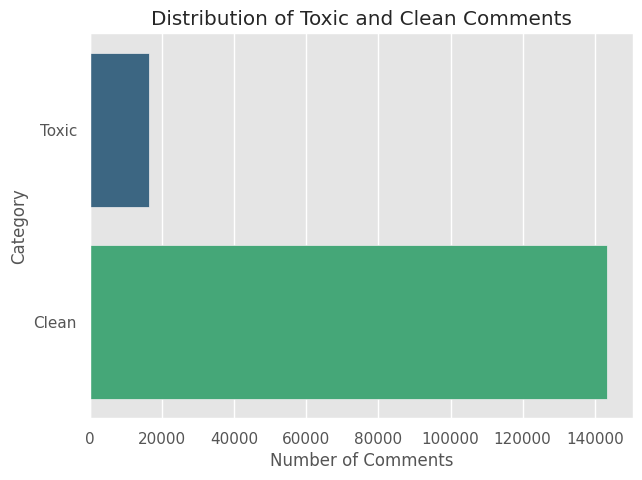

In [ ]:
# Create subsets based on toxic and clean comments
train_toxic = data[data[column_labels].sum(axis=1) > 0]
train_clean = data[data[column_labels].sum(axis=1) == 0]

# Number of toxic and clean comments
num_toxic = len(train_toxic)
num_clean = len(train_clean)

# Create a DataFrame for visualization
plot_data = pd.DataFrame(
    {'Category': ['Toxic', 'Clean'], 'Count': [num_toxic, num_clean]})

# Create a black background for the plot
plt.figure(figsize=(7, 5))

# Horizontal bar plot
ax = sns.barplot(x='Count', y='Category', data=plot_data, palette='viridis')


# Add labels and title to the plot
plt.xlabel('Number of Comments')
plt.ylabel('Category')
plt.title('Distribution of Toxic and Clean Comments')

# Set ticks' color to white
ax.tick_params()

# Show the plot
plt.show()

In [ ]:
train_clean_sampled = train_clean.sample(n=16225, random_state=42)

# Combine the toxic and sampled clean comments
dataframe = pd.concat([train_toxic, train_clean_sampled], axis=0)

# Shuffle the data to avoid any order bias during training
dataframe = df.sample(frac=1, random_state=42)